In [1]:
import pandas as pd;
import numpy as np;

In [2]:
import matplotlib.pyplot as plt;


In [3]:
import seaborn as sns;

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
nul_check_matrix = train.isnull()

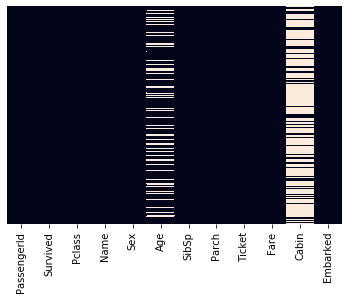

In [8]:
sns.heatmap(nul_check_matrix,yticklabels=False,cbar=False)

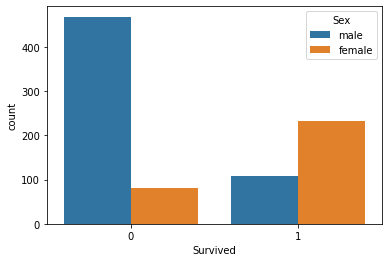

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train)

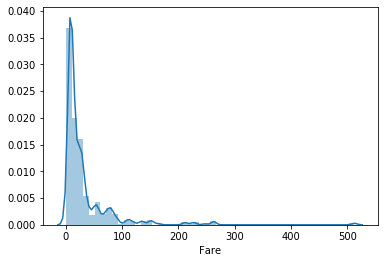

In [10]:
sns.distplot(train['Fare'])

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


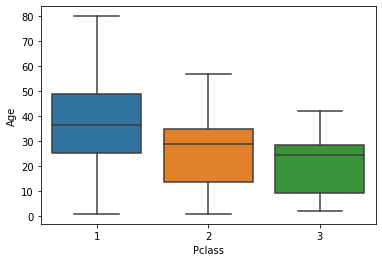

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train.dropna())

In [46]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass is 1:
            return 37
        elif Pclass is 2:
            return 27
        else:
            return 23
    else:
        return age

In [50]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [51]:
impute_age([None,train['Pclass'][0]])

23

In [54]:
nul_check_matrix=train.isnull()


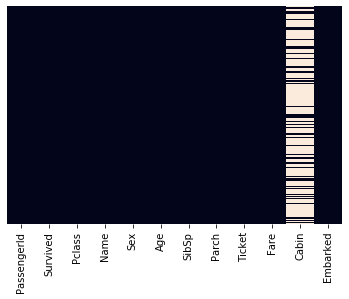

In [55]:
sns.heatmap(nul_check_matrix,yticklabels=False,cbar=False)

In [57]:
train.drop('Cabin',axis=1,inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
train=pd.concat([train,sex,embarked],axis=1)

In [77]:
train.drop(['Sex','Pclass','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [79]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,22.0,1,0,7.2500,S,1,0,1
1,1,38.0,1,0,71.2833,C,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,1
3,1,35.0,1,0,53.1000,S,0,0,1
4,0,35.0,0,0,8.0500,S,1,0,1


In [90]:
X = train.drop('Survived',axis=1)
y=train['Survived']
X=X.drop('Embarked',axis=1)

In [80]:
from sklearn.linear_model import LogisticRegression;

In [81]:
from sklearn.model_selection import train_test_split;

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [92]:
logmodel = LogisticRegression()

In [93]:
logmodel.fit(X_train,y_train)

/home/umang/anaconda3/envs/data_science_udemy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions = logmodel.predict(X_test)

In [96]:
from sklearn.metrics import classification_report;

In [97]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.86      0.81       154\n           1       0.77      0.65      0.70       114\n\n    accuracy                           0.77       268\n   macro avg       0.77      0.75      0.76       268\nweighted avg       0.77      0.77      0.77       268\n'

In [98]:
from sklearn.metrics import confusion_matrix;

In [100]:
confusion_matrix(y_test,predictions)

array([[132,  22],
       [ 40,  74]])